<a href="https://colab.research.google.com/github/ShabanNM/ShabanNM/blob/main/FinalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: ***Shaban Mohamed Namatsi***
<br><br>

ID: USER1296211/ R2105D12296211


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Import PyTorch Library, nn Neural netwroks and transform for transforming data
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
# deep learning libraries
import keras
from keras.datasets import cifar10 as dsets
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model, model_from_json

Get CIFAR-10 Data trainset of 50,000 images train data and 10,000 images as test data.




In [2]:
batch_size = 6
# First the image is resized then converted to a tensor
composed = transforms.Compose([transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=composed)
composed = transforms.Compose([torchvision.transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=composed)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
len(trainset), len(testset)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(50000, 10000)

To view sample of CIFAR images for instance random 6 Train dataset execute 

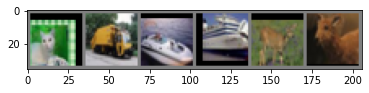

cat   truck ship  ship  deer  deer 


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Creating a CNN class. The class for our logistic regression model inherits from the nn.Module class from PyTorch library and has a construcotr to initialize itself.<br>
Additionally, the CNN class has **forward** function  that takes an image as an input and makes a prediction on which label it thinks is the right one. After image input through all the convolutional, max pool layers (**nn.Conv2d() and nn.MaxPool2d()**) and  using the relu activation functionto convert the image input from the 3-D input it received into a 1-D vector which the linear layers can work with. Lastly, the last layer uses softmax function that has Cross entropy loss to get a probability distribution for the predictions which image it is.<br>
After declaration, Instantiate the CNN class as **net**.

In [4]:
import torch.nn.functional as F
class CNN(nn.Module):
    # Contructor
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net=CNN()

**Define a loss function and optimizer:** This is done using a classification Cross-Entropy loss and Stochastic Gradient Descent(SGD) with momentum.
<br>

**Training** of the model using learning rate of 0.0001 and momentum of 0.9 and number of epochs is 5

In [24]:
import torch.optim as optim
n_epochs=5
lr=0.0001
momentum=0.9
epoch_list=[]
cost_list=[]
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
def train_model(n_epochs):
  for epoch in range(n_epochs):  # loop over the dataset three times
      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
        
          # print statistics
          running_loss += loss.item()
          if i % 8000 == 7999:    # print every 8000 mini-batches
              cost_list.append(running_loss / 8000)
              epoch_list.append((epoch + 1))

train_model(n_epochs)

Save trained model for future use in predictions and display the loss in each running through a batch 2000 training images for the three epoch sessions.

In [25]:
PATH = './dl_cifar_cnn.pth'
torch.save(net.state_dict(), PATH)

EPOCK		 LOSS				LOSS DIFFERNCE
1 		0.9158512574441265 		0.9158512574441265
2 		0.8939335002340376 		0.02191775721008893
3 		0.8850615390301682 		0.00887196120386946
4 		0.8735652883106377 		0.011496250719530421
5 		0.8704014405889903 		0.0031638477216474614


Text(0.5, 1.0, 'NO. OF EPOCHS AGAINST LOSS/ COST')

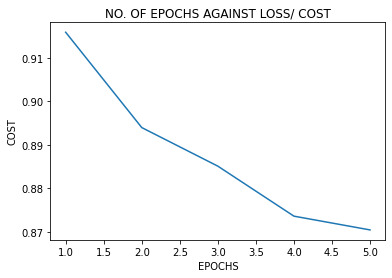

In [26]:
print("EPOCK\t\t LOSS\t\t\t\tLOSS DIFFERNCE")
diff=0.0
dc=[]
for i in range(len(cost_list)):
  if i!=0: #Get cost loss difference of current from previous
    d=diff-cost_list[i]
  else: #First difference is negative, get absolute value 
    d=abs(diff-cost_list[i])
  print ("{}".format(epoch_list[i]),"\t\t{}".format(cost_list[i]),"\t\t{}".format(d))
  dc.append(d)
  diff=cost_list[i]
#plot the chart of epochs and cost
plt.plot(epoch_list,cost_list)
plt.xlabel('EPOCHS')
plt.ylabel('COST')
plt.title('NO. OF EPOCHS AGAINST LOSS/ COST')

Carry out prediction on six randomly selected images fro test data set and display both the image and predicted class.


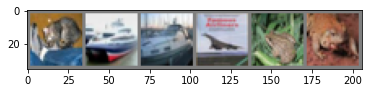

GroundTruth:  cat   ship  ship  plane frog  frog 


In [27]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(6)))

We check what the neural network thinks these examples above are:

In [28]:
net = CNN()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(6)))

Predicted:  cat   ship  ship  plane frog  frog 


Everything is matching perfectly as expected as shown in the prediction below.

In [29]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'for j in range(6)))

Predicted:  cat   ship  ship  plane frog  frog 


In [30]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 70 %


The overall Accuracy peformance for each the 10 classes is 55% which is better. 

In [31]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 84 %
Accuracy of  bird : 59 %
Accuracy of   cat : 45 %
Accuracy of  deer : 64 %
Accuracy of   dog : 65 %
Accuracy of  frog : 80 %
Accuracy of horse : 73 %
Accuracy of  ship : 80 %
Accuracy of truck : 80 %


Carrying out predictions from the model using test data set. We create predict function to use the model in prediction and check_sample function to display the image being predicted, the predicted and desired class.

In [32]:
def predict(input):
    out = net(input.reshape(1, 3, 32, 32))
    _, pred = torch.max(out, dim=1)
    return classes[pred]

def check_sample(img_label_pair):
    imshow(img_label_pair[0])
    print("Predicted: " + predict(img_label_pair[0]))
    print("Desired output: " + classes[img_label_pair[1]])

Use the code below to test the model classification performance of 10000 cifar10 test dataset using testset[0..9999]

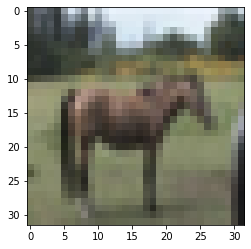

Predicted: horse
Desired output: horse


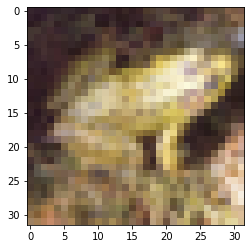

Predicted: frog
Desired output: frog


In [36]:
check_sample(testset[9999])
check_sample(testset[19])